#Covid19 Data Analysis
------------------------------------------

### Importing the Modules

In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## Importing covid19 dataset and cleaning it
 


In [12]:
covid_raw = pd.read_csv("covid19_Confirmed_dataset.csv")
covid_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [13]:
covid_raw.drop(['Lat','Long'], axis = 1, inplace = True)

### Aggregating the rows by the country

In [15]:
covid_main = covid_raw.groupby("Country/Region").sum()

In [16]:
covid_main.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
covid_main.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
Zambia,0,0,0,0,0,0,0,0,0,0,...,70,74,76,84,84,88,88,95,97,106
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,28,28,28,29,31,31,32,32,32,40


### Visualizing data related to countries

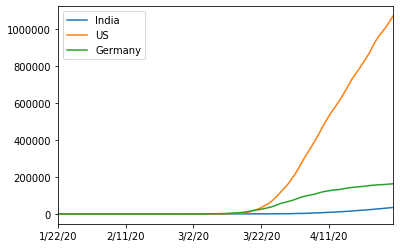

In [23]:
covid_main.loc['India'].plot()
covid_main.loc['US'].plot()
covid_main.loc['Germany'].plot()
plt.legend()

### Calculating a good measure 


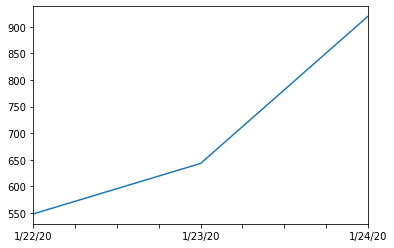

In [29]:
covid_main.loc['China'][:3].plot()

### Caculating the first derivative of the curve for India

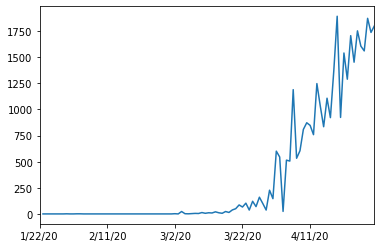

In [33]:
covid_main.loc['India'].diff().plot()

### Maximum Infection Rate For India

In [34]:
covid_main.loc['India'].diff(periods = 1).max()

1893.0

### Calculating maximum infection rate for all of the countries. 

In [56]:
countries = list(covid_main.index)

187

In [63]:
max_rates = []

In [64]:
for x in countries:
    max_rates.append(covid_main.loc[x].diff(periods = 1).max())
covid_main['Max Infection Rate'] = max_rates

### creating a new dataframe with only needed column for joining 

In [95]:
covid_joiner = pd.DataFrame(covid_main['Max Infection Rate'])
covid_joiner.head()

,Max Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing the world happiness dataset

In [74]:
happy_report = pd.read_csv('worldwide_happiness_report.csv')

In [75]:
happy_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Removing unneeded columns 

In [76]:
happy_report.drop(['Overall rank','Score','Generosity','Freedom to make life choices', 'Perceptions of corruption'], axis = 1, inplace = True)

In [93]:
happy_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy
0,Finland,1.340,1.587,0.986
1,Denmark,1.383,1.573,0.996
2,Norway,1.488,1.582,1.028
3,Iceland,1.380,1.624,1.026
4,Netherlands,1.396,1.522,0.999


### Changing Indices To Country

In [96]:
happy_report.set_index('Country or region', inplace = True)

### Joining the two datasets  

In [90]:
covid_joiner.shape

(187, 1)

In [82]:
happy_report.shape

(156, 4)

In [103]:
combidata = covid_joiner.join(happy_report, how = 'inner')
combidata.head()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy
Afghanistan,232.0,0.350,0.517,0.361
Albania,34.0,0.947,0.848,0.874
Algeria,199.0,1.002,1.160,0.785
Argentina,291.0,1.092,1.432,0.881
Armenia,134.0,0.850,1.055,0.815


### Correlation matrix 

In [130]:
corrl = combidata.corr()
corrl

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy
Max Infection Rate,1.000000,0.250118,0.191958,0.289263
GDP per capita,0.250118,1.000000,0.759468,0.863062
Social support,0.191958,0.759468,1.000000,0.765286
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000


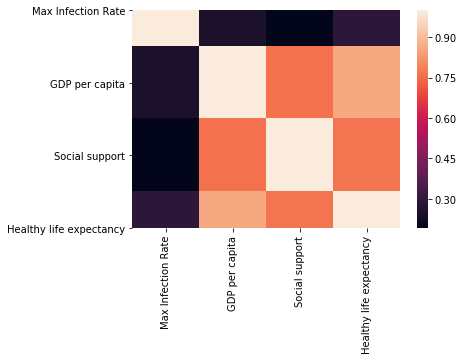

In [131]:
sns.heatmap(corrl)

### Visualization of the results

In [104]:
y = combidata['Max Infection Rate']
x = combidata['GDP per capita']

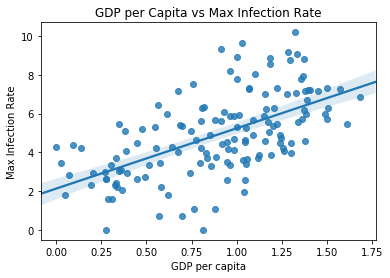

In [109]:
plt.title('GDP per Capita vs Max Infection Rate')
sns.regplot(x,np.log(y))

In [110]:
y = combidata['Max Infection Rate']
x = combidata['Social support']

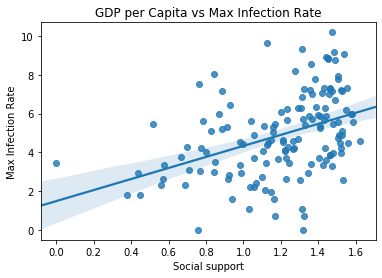

In [111]:
plt.title('Social Support vs Max Infection Rate')
sns.regplot(x,np.log(y))

In [113]:
y = combidata['Max Infection Rate']
x = combidata['Healthy life expectancy']

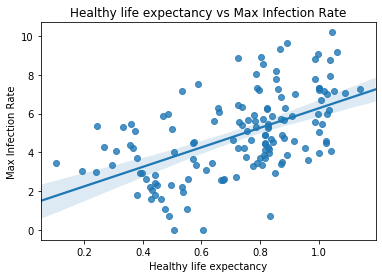

In [115]:
plt.title('Healthy life expectancy vs Max Infection Rate')
sns.regplot(x,np.log(y))

In [123]:
y = combidata['Social support']
x = combidata['GDP per capita']

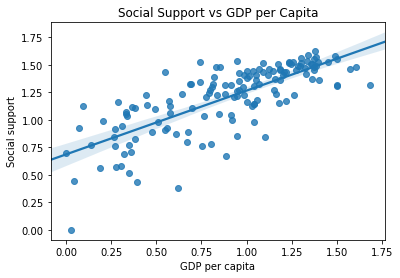

In [126]:
plt.title('Social Support vs GDP per Capita')
sns.regplot(x,y)

In [119]:
y = combidata['Healthy life expectancy']
x = combidata['GDP per capita']

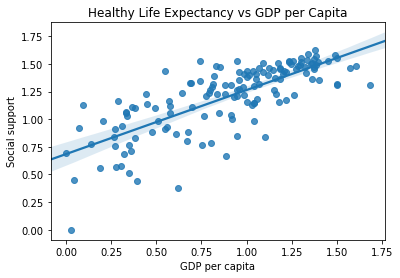

In [125]:
plt.title('Healthy Life Expectancy vs GDP per Capita')
sns.regplot(x,y)

## Analysis

Clearly, as we can see from the scatterplot, the maximum rate of infection rises with the increase in GDP per capita. The same holds true when we plot rate of infection versus healthy life expectancy and rate of infection versus Social Support. However, upon plotting these two attributes against GDP per Capita, we also found that they increase with GDP per Capita. From the correlation matrix, we now know that the healthy life expectancy has the most effect on the maximum infection rate i.e. healthier countries tend to be more infection free